In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicHermiteSpline

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# 1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

## Dataframe usando pandas:

In [2]:
dicc = {'Corriente (A)':[3.10,3.12,3.14,3.18,3.24] , 'Tiempo (s)': [1.00,1.01,1.02,1.03,1.04]}
dataframe = pd.DataFrame(dicc)
dataframe

,Corriente (A),Tiempo (s)
0,3.10,1.00
1,3.12,1.01
2,3.14,1.02
3,3.18,1.03
4,3.24,1.04


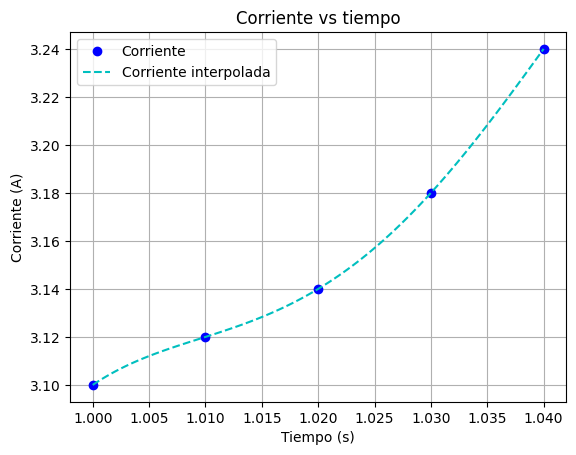

In [3]:
L = 0.98
R = 0.142
i = np.array(dataframe['Corriente (A)'])
t = np.array(dataframe['Tiempo (s)'])
t_continuo = np.linspace(min(t), max(t), 100)
pol_i = BarycentricInterpolator(t,i)

plt.plot(t, i, 'bo', label='Corriente')
plt.plot(t_continuo, pol_i(t_continuo), 'c--', label='Corriente interpolada')
plt.plot
plt.title('Corriente vs tiempo')
plt.legend()
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.grid()
plt.show()


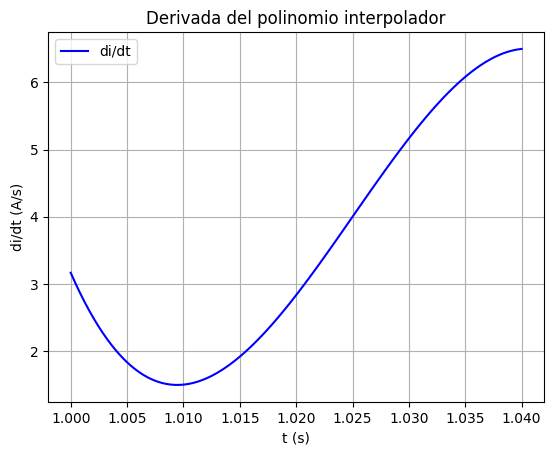

In [19]:
di_pol = pol_i.derivative(t_continuo)

plt.plot(t_continuo, di_pol, 'b-', label='di/dt')
plt.title('Derivada del polinomio interpolador')
plt.legend()
plt.ylabel('di/dt (A/s)')
plt.xlabel('t (s)')
plt.grid()
plt.show()

## Calculando la derivada de la corriente por np.gradient:

[2. 2. 3. 5. 7.]
[2. 2. 3. 5. 6.]


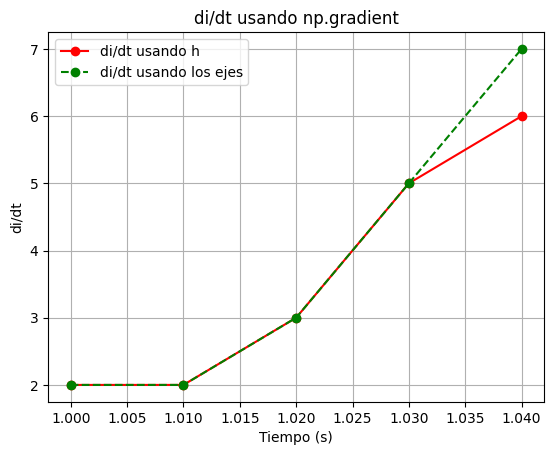

In [6]:
di_gradient = np.gradient(i,0.01)
di = np.gradient(i,t, edge_order=2)
#di_continua = np.gradient(i, t, edge_order=2)
print(di)
print(di_gradient)

plt.plot(t, di_gradient, 'ro-', label='di/dt usando h')
plt.plot(t, di, 'go--', label='di/dt usando los ejes')
plt.title('di/dt usando np.gradient')
plt.legend()
plt.ylabel('di/dt')
plt.xlabel('Tiempo (s)')
plt.grid()
plt.show()

## Calculando la derivada por diferencias finitas:

In [7]:
def forward_diff(f,x,h):
  return (f(x+h)-f(x))/h

def backward_diff(f,x,h):
  return (f(x)-f(x-h))/h

def centered_diff(f,x,h):
  return (f(x+h)-f(x-h))/(2*h)

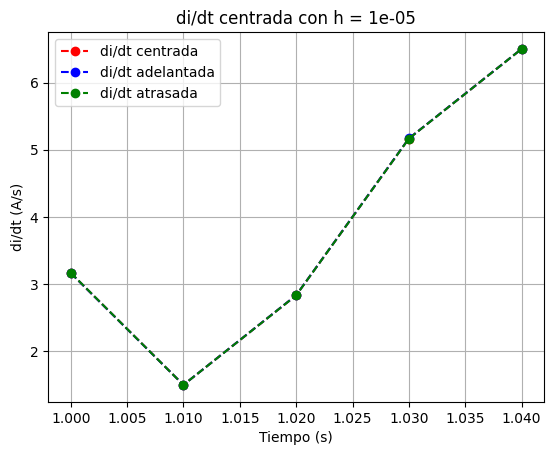

In [8]:
h = 0.00001
di_centered = centered_diff(pol_i, t, h)
di_adelante = forward_diff(pol_i, t, h)
di_atras = backward_diff(pol_i, t, h)

plt.plot(t, di_centered, 'ro--', label='di/dt centrada')
plt.plot(t, di_adelante, 'bo--', label='di/dt adelantada')
plt.plot(t, di_atras, 'go--', label='di/dt atrasada')
plt.title(f'di/dt centrada con h = {h}')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('di/dt (A/s)')
plt.grid()
plt.show()

## Calculando la derivada por tres puntos:

In [7]:
def tres_puntos(f, x, h):
    n = len(x)
    derivative = np.zeros(len(x))
    for i in range(n):
        if i == 0:
            derivative[i] = (-3*f(x[i]) + 4*f(x[i]+h) - f(x[i]+2*h))/(2*h)
        elif i == n-1:
            derivative[i] = (3*f(x[i]) - 4*f(x[i]-h) + f(x[i]-2*h))/(2*h)
        else:
            derivative[i] = (f(x[i]+h) - f(x[i]-h))/(2*h)
    return derivative

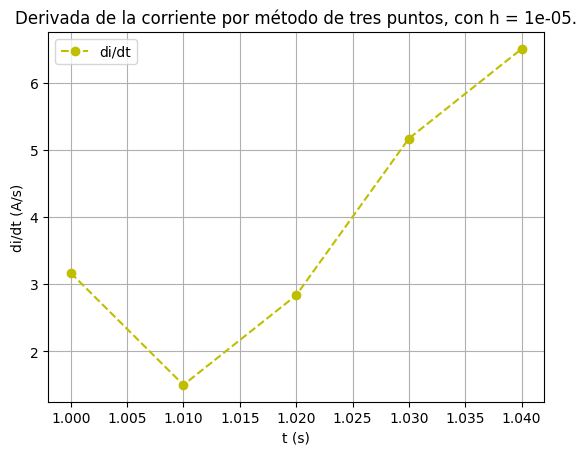

In [8]:
h = 0.00001
di_tres = tres_puntos(pol_i, t, h)

plt.plot(t, di_tres, 'yo--', label='di/dt')
plt.title(f'Derivada de la corriente por método de tres puntos, con h = {h}.')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('di/dt (A/s)')
plt.grid()
plt.show()

## Calculando la derivada exacta:

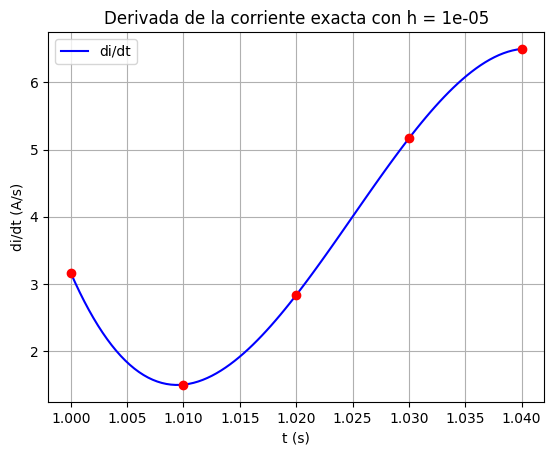

In [9]:
di_centered_exacta = tres_puntos(pol_i, t_continuo, h)

plt.plot(t_continuo, di_centered_exacta, 'b-', label='di/dt')
plt.plot(t, di_tres, 'ro')
plt.title(f'Derivada de la corriente exacta con h = {h}')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('di/dt (A/s)')
plt.grid()
plt.show()

## Calculando el voltaje $\varepsilon(t)$:

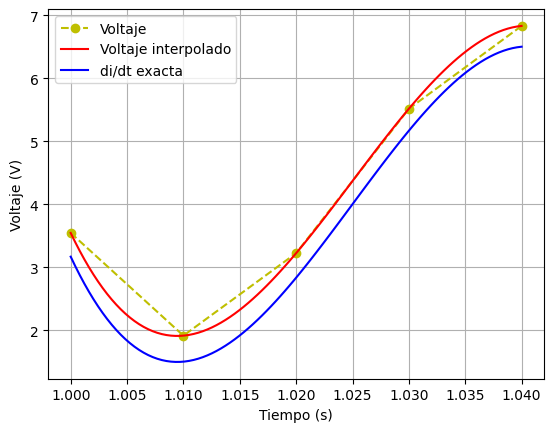

In [10]:
epsilon = L*di_tres + R*i
epsilon_pol = BarycentricInterpolator(t, epsilon)

plt.plot(t, epsilon, 'yo--', label='Voltaje')
plt.plot(t_continuo, epsilon_pol(t_continuo), 'r-', label='Voltaje interpolado')
plt.plot(t_continuo, di_centered_exacta, 'b-', label='di/dt exacta')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid()
plt.show()

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

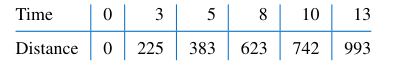



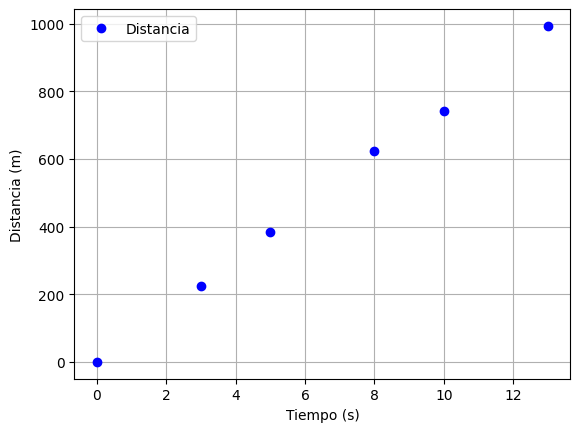

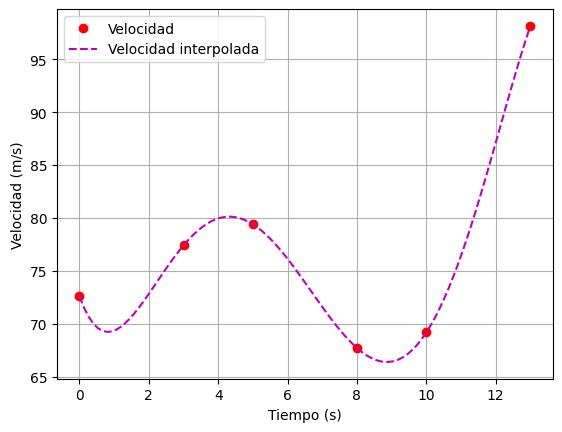

In [11]:
time = np.array([0,3,5,8,10,13])
time_continuo = np.linspace(min(time), max(time), 100)
distance = np.array([0,225,383,623,742,993])
h = 0.01
velocidad = np.gradient(distance, time, edge_order=2)
vel_pol = BarycentricInterpolator(time, velocidad)

plt.plot(time, distance, 'bo', label='Distancia')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.legend()
plt.grid()
plt.show()

plt.plot(time, velocidad, 'ro', label='Velocidad')
plt.plot(time_continuo, vel_pol(time_continuo), 'm--', label='Velocidad interpolada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.grid()
plt.show()

Velocidad para t = 12:

In [12]:
t12 = vel_pol(12)
print(f'Cuando t = 12s, la velocidad es de: {t12} m/s')

Cuando t = 12s, la velocidad es de: 87.10199999999993 m/s


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

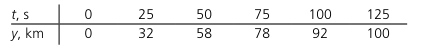

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

## Usando tres puntos:

In [ ]:
dicc2 = {'Tiempo (s)':[0, 25, 50, 75, 100, 125], 'Distancia (km)':[0,32,58,78,92,100]}
cohete = pd.DataFrame(dicc2)

dist = np.array(cohete['Distancia (km)'])
tiempo = np.array(cohete['Tiempo (s)'])

h = 0.001

[-0.0096 -0.0096 -0.0096 -0.0096 -0.0096 -0.0096]


np.int64(125)

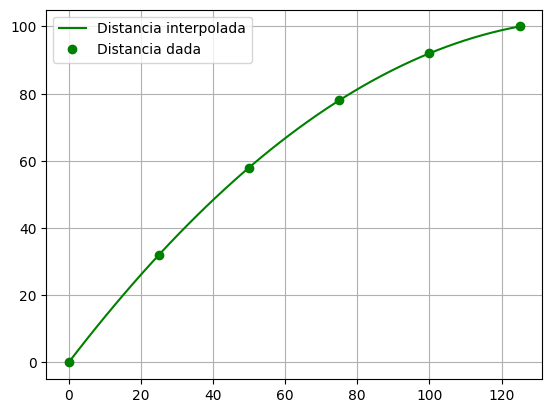

In [63]:
dist_pol = BarycentricInterpolator(tiempo, dist)
tiempo_c = np.linspace(min(tiempo), max(tiempo), 50)
plt.plot(tiempo_c, dist_pol(tiempo_c), 'g-', label='Distancia interpolada')
plt.plot(tiempo, dist, 'go', label='Distancia dada')
plt.legend()
plt.grid()
plt.show()

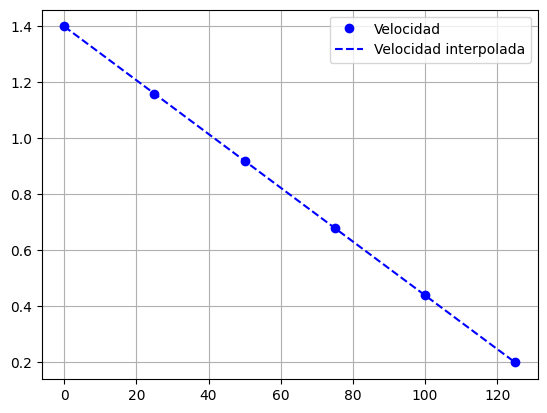

In [64]:
vel2 = tres_puntos(dist_pol, tiempo, h)
vel2_pol = BarycentricInterpolator(tiempo, vel2)

plt.plot(tiempo, vel2, 'bo', label='Velocidad')
plt.plot(tiempo_c, vel2_pol(tiempo_c), 'b--', label='Velocidad interpolada')
plt.legend()
plt.grid()
plt.show()

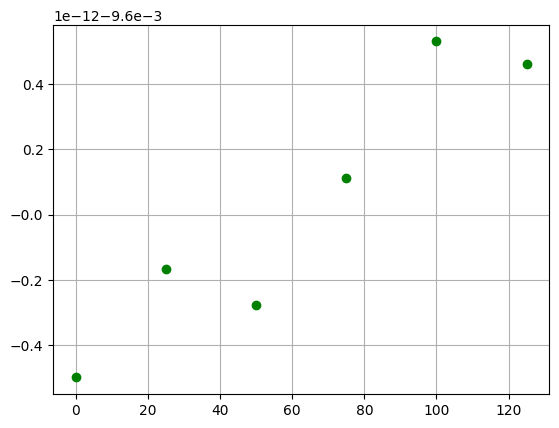

In [75]:
acel2 = tres_puntos(vel2_pol, tiempo, h)
acel2_pol =BarycentricInterpolator(tiempo, acel2)

plt.plot(tiempo, acel2, 'go')
plt.grid()
plt.show()

## Usando np.gradient():

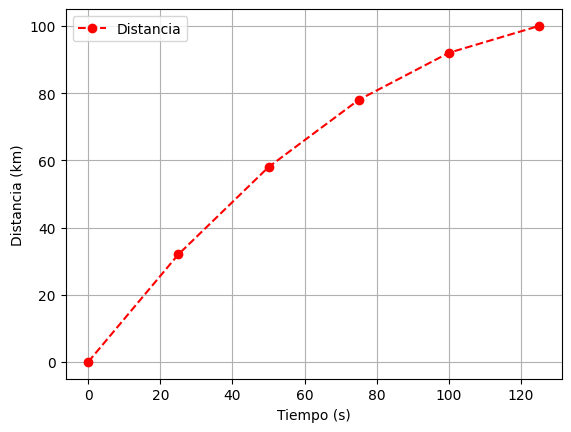

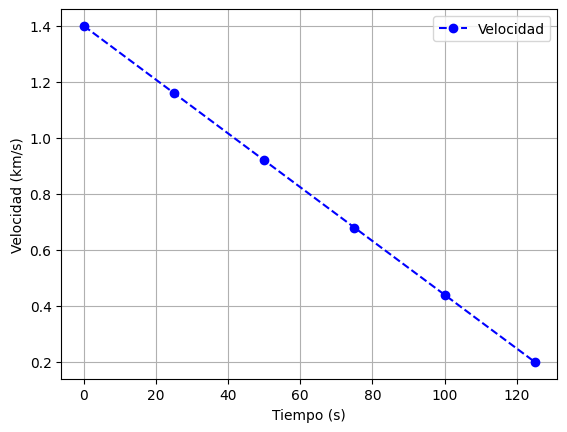

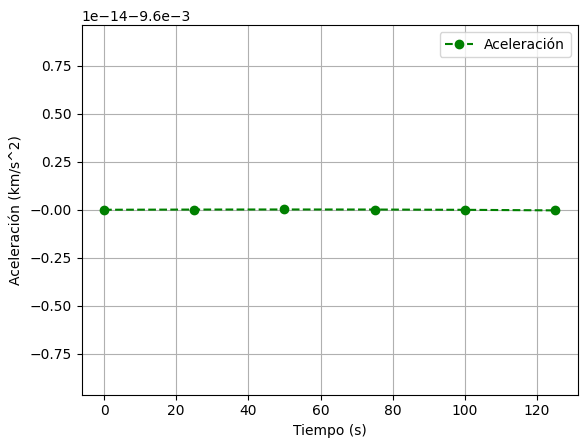

In [ ]:
vel = np.gradient(dist, tiempo, edge_order=2)
aceleration = np.gradient(vel,tiempo, edge_order=2)

plt.plot(tiempo, dist, 'ro--', label='Distancia')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (km)')
plt.grid()
plt.show()

plt.plot(tiempo, vel, 'bo--', label='Velocidad')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (km/s)')
plt.grid()
plt.show()

plt.plot(tiempo, aceleration, 'go--', label='Aceleración')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (km/s^2)')
plt.grid()
plt.show()

# 4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

## a. Usando la librería de Sympy:

In [15]:
z = sp.symbols('z')
#k = sp.symbols('k')
q = sp.symbols('q')
R = 0.0001
V = (1)/(R**2 + z**2)**(1/2)
V

(z**2 + 1.0e-8)**(-0.5)

In [16]:
Vl = sp.lambdify(z, V)

In [17]:
E_z = sp.diff(V,z)

In [18]:
E_z

-1.0*z/(z**2 + 1.0e-8)**1.5

In [19]:
E_zl = sp.lambdify(z, E_z)

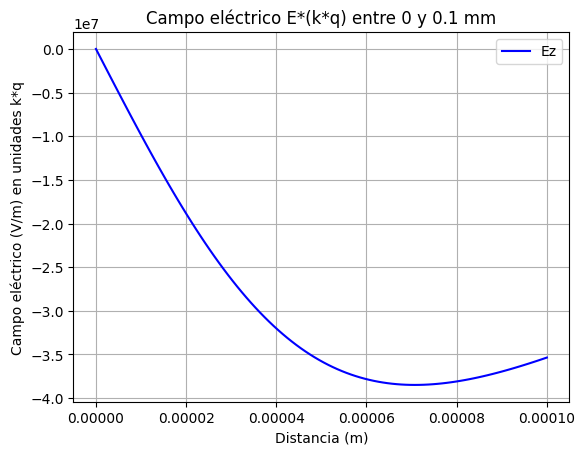

In [20]:
z1 = np.linspace(0, 0.0001, 100)
#print(E_zl(z1))
#print(E_zl(0.0001))
plt.plot(z1, E_zl(z1), 'b-', label='Ez')
plt.title('Campo eléctrico E*(k*q) entre 0 y 0.1 mm')
plt.legend()
plt.xlabel('Distancia (m)')
plt.ylabel('Campo eléctrico (V/m) en unidades k*q')
plt.grid()
plt.show()

## b y c. Usando np.gradient:

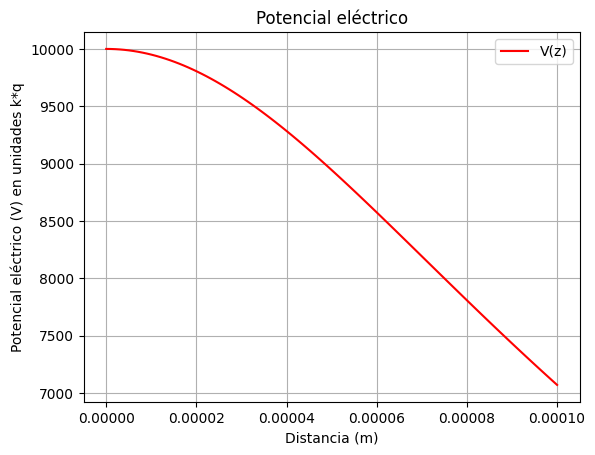

In [21]:
plt.plot(z1, Vl(z1), 'r-', label='V(z)')
plt.title('Potencial eléctrico')
plt.legend()
plt.xlabel('Distancia (m)')
plt.ylabel('Potencial eléctrico (V) en unidades k*q')
plt.grid()
plt.show()

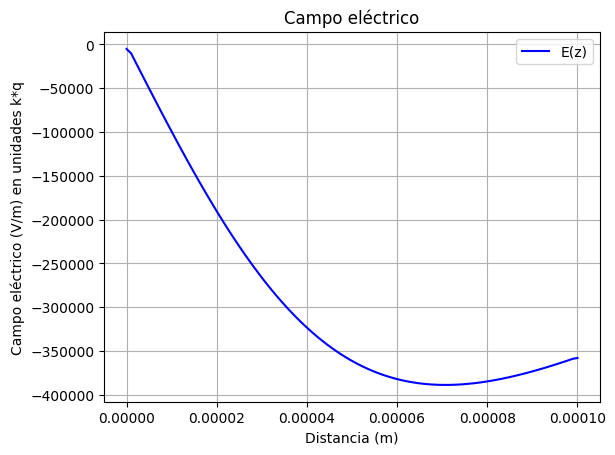

In [22]:
h = 0.0001
E = np.gradient(Vl(z1), h)

plt.plot(z1, E, 'b-', label='E(z)')
plt.title('Campo eléctrico')
plt.legend()
plt.xlabel('Distancia (m)')
plt.ylabel('Campo eléctrico (V/m) en unidades k*q')
plt.grid()
plt.show()

In [23]:
print(f'El valor del campo eléctrico en z = 0.1 mm es de {E_zl(0.0001)} V/m en unidades k*q.')

El valor del campo eléctrico en z = 0.1 mm es de -35355339.05932738 V/m en unidades k*q.
